<a href="https://colab.research.google.com/github/farogfayz/Freq.Anal/blob/main/Attack_classifier_DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS1/UDPLag.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS1/Portmap.csv')

data.head()

<ipython-input-2-26fb38607dfd>:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS1/UDPLag.csv')
<ipython-input-2-26fb38607dfd>:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS1/Portmap.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191694 entries, 0 to 191693
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    191694 non-null  int64  
 1   Flow ID                       191694 non-null  object 
 2    Source IP                    191694 non-null  object 
 3    Source Port                  191694 non-null  int64  
 4    Destination IP               191694 non-null  object 
 5    Destination Port             191694 non-null  int64  
 6    Protocol                     191694 non-null  int64  
 7    Timestamp                    191694 non-null  object 
 8    Flow Duration                191694 non-null  int64  
 9    Total Fwd Packets            191694 non-null  int64  
 10   Total Backward Packets       191694 non-null  int64  
 11  Total Length of Fwd Packets   191694 non-null  float64
 12   Total Length of Bwd Packets  191694 non-nul

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


# Pre-process the data
# Encode categorical features (e.g., IP addresses)
encoder = LabelEncoder()
data[' Source IP'] = encoder.fit_transform(data[' Source IP'])
#data['Destination Port'] = encoder.fit_transform(data['Destination Port'])
data[' Destination IP'] = encoder.fit_transform(data[' Destination IP'])
data[' Timestamp'] = pd.to_datetime(data[' Timestamp']).astype(np.int64)
data[' Label'] = encoder.fit_transform(data[' Label'])
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,90,0,124,0,0,1541236696964447000,114456999,45,...,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,0
1,26,192.168.50.253-224.0.0.5-0-0-0,89,0,124,0,0,1541236698506537000,114347504,56,...,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,0
2,176563,172.217.10.98-192.168.50.6-443-54799-6,92,54799,33,443,6,1541236698610576000,36435473,6,...,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,0
3,50762,172.217.7.2-192.168.50.6-443-54800-6,92,54800,76,443,6,1541236698610579000,36434705,6,...,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,0
4,87149,172.217.10.98-192.168.50.6-443-54801-6,92,54801,33,443,6,1541236698610581000,36434626,6,...,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,0


In [5]:
# Drop unnecessary columns
try:
  data = data.drop(['Unnamed: 0', 'Flow ID', 'SimillarHTTP'], axis=1)
except:
  print('Columns are dropped already')

# Set the desired number of majority class samples
num_majority_samples = 100000

# Get the minority class label
minority_class = data[' Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data[data[' Label'] != minority_class]
minority_samples = data[data[' Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Combine the sampled majority class samples and minority class samples
balanced_data = pd.concat([majority_samples_sampled, minority_samples], axis=0)

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,17,648,97,63368,17,1541239298600818000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,17,942,97,53067,17,1541239304593020000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,17,648,97,39363,17,1541239290068422000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,17,609,97,33862,17,1541239295934489000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,17,648,97,25385,17,1541239293982211000,1,2,0,458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [6]:
balanced_data[' Label'].value_counts()

1    100000
0      4734
Name:  Label, dtype: int64

In [7]:
data[' Label'].value_counts()

1    186960
0      4734
Name:  Label, dtype: int64

In [8]:
import pandas as pd

# Assuming your dataset is named 'data'
correlation = balanced_data[' Inbound'].corr(balanced_data[' Label'])
print("Correlation between 'Inbound' and 'Label':", correlation)


Correlation between 'Inbound' and 'Label': 0.8782898768888296


In [9]:
balanced_data[' Inbound'].value_counts()

1    100549
0      4185
Name:  Inbound, dtype: int64

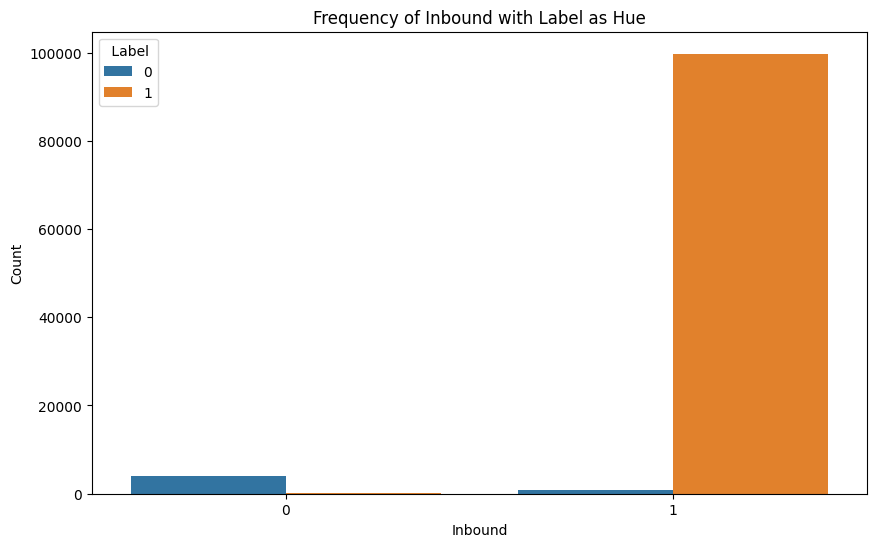

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Inbound', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue')
plt.xlabel('Inbound')
plt.ylabel('Count')
plt.show()


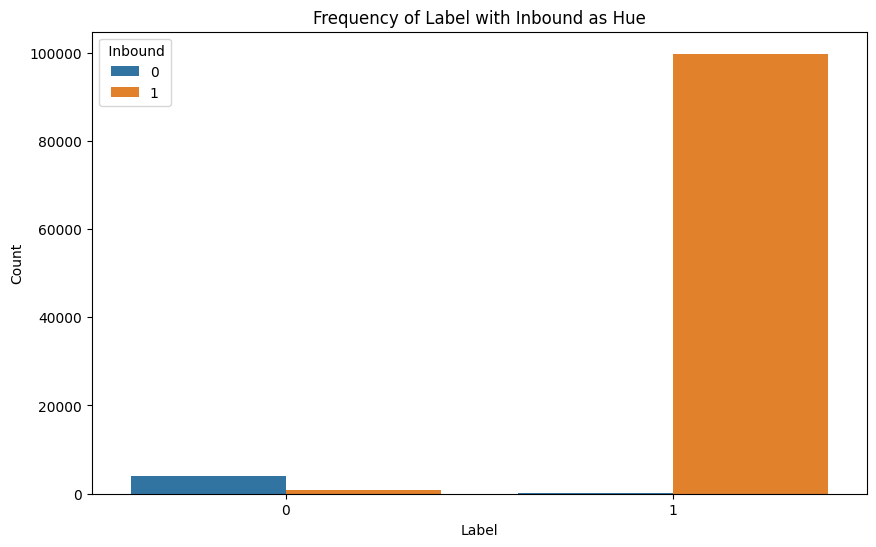

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Label', hue=' Inbound')
plt.title('Frequency of Label with Inbound as Hue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


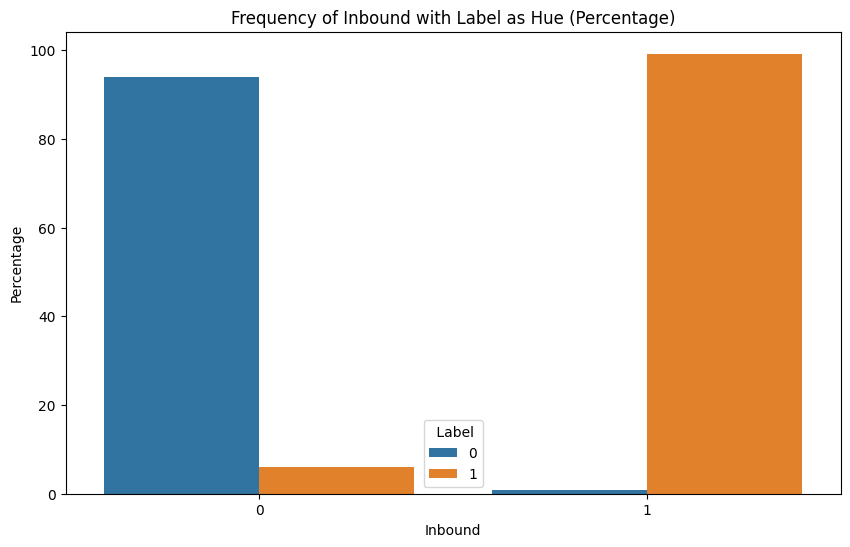

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
inbound_label_counts = balanced_data.groupby([' Inbound', ' Label']).size().reset_index(name='Count')
total_counts = balanced_data.groupby([' Inbound']).size().reset_index(name='Total_Count')

inbound_label_counts = inbound_label_counts.merge(total_counts, on=' Inbound')
inbound_label_counts['Percentage'] = (inbound_label_counts['Count'] / inbound_label_counts['Total_Count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=inbound_label_counts, x=' Inbound', y='Percentage', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue (Percentage)')
plt.xlabel('Inbound')
plt.ylabel('Percentage')
plt.show()


In [13]:
inbound_label_counts

,Inbound,Label,Count,Total_Count,Percentage
0,0,0,3932,4185,93.954600
1,0,1,253,4185,6.045400
2,1,0,802,100549,0.797621
3,1,1,99747,100549,99.202379


In [14]:

# Split the data into train and test sets
X = balanced_data.drop([' Inbound',' Label'], axis=1)
y = balanced_data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=42)



In [15]:
X_train.isnull().sum().sum()

1

In [16]:
import numpy as np

def check_data_issues(data):
    # Check for NaN values
    if data.isnull().values.any():
        print("There are NaN values in the dataset.")

    # Check for infinite values
    if np.isinf(data).values.any():
        print("There are infinite values in the dataset.")
        
    # Check for extremely large values
    max_value = data.max().max()
    if max_value > np.finfo(np.float64).max:
        print(f"There are values too large for dtype('float64') in the dataset. Max value: {max_value}")

    # Check for extremely small values
    min_value = data.min().min()
    if min_value < np.finfo(np.float64).min:
        print(f"There are values too small for dtype('float64') in the dataset. Min value: {min_value}")

# Check the training and testing data for any issues
check_data_issues(X_train)
check_data_issues(X_test)


There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf


In [17]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of the corresponding column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# # Handle class imbalance using SMOTE
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)



In [19]:
# # Train and evaluate machine learning models
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Random Forest": RandomForestClassifier(),
#     "Support Vector Machine": SVC()
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print(f"{name}:")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
#     print(f"F1 score: {f1_score(y_test, y_pred, average='weighted')}")
#     print(classification_report(y_test, y_pred))
#     print("\n")


In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create an empty DataFrame with the desired columns
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Train and evaluate machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append the metrics to the DataFrame
    model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Display the comparison DataFrame
model_comparison

<ipython-input-20-0b838cada86a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Logistic Regression:
Accuracy: 0.9994271347188186
F1 score: 0.9994273267422398
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       1.00      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421





<ipython-input-20-0b838cada86a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Random Forest:
Accuracy: 0.9999681741510454
F1 score: 0.9999681794870047
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       1.00      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421



Support Vector Machine:
Accuracy: 0.9994907864167276
F1 score: 0.9994921448743179
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1420
           1       1.00      1.00      1.00     30001

    accuracy                           1.00     31421
   macro avg       0.99      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421





<ipython-input-20-0b838cada86a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


,Model,Accuracy,F1 Score
0,Logistic Regression,0.999427,0.999427
1,Random Forest,0.999968,0.999968
2,Support Vector Machine,0.999491,0.999492


In [21]:
feature_columns = X.columns

# Get the Random Forest model from the 'models' dictionary
random_forest_model = models['Random Forest']

# Get feature importances
importances = random_forest_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances DataFrame
# Filter the DataFrame to show only features with non-zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] > 0]

# Display the filtered DataFrame
non_zero_importances


,Feature,Importance
0,Source IP,0.123895
43,Min Packet Length,0.114061
12,Fwd Packet Length Min,0.096908
5,Timestamp,0.095737
57,Average Packet Size,0.084180
...,...,...
80,Idle Std,0.000096
76,Active Std,0.000081
50,RST Flag Count,0.000066
18,Bwd Packet Length Std,0.000022


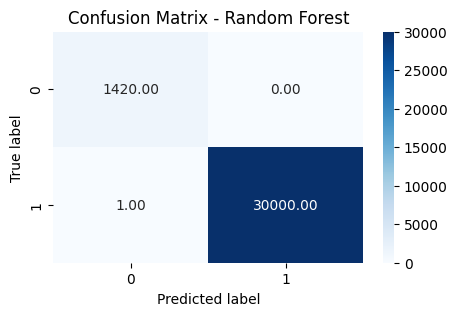

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Choose the model you want to use, for example, Random Forest
model = models["Random Forest"]
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
